In [6]:
import glob
import numpy as np
import pandas as pd
from scipy.signal import decimate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pyabf
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
plt.style.use('seaborn')
np.set_printoptions(precision=3)

In [7]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

def time_idx(seconds):
    if seconds>=0:
        idx = seconds/abfHeader.header['timeSecPerPoint']
    elif seconds<0:
        idx = (seconds+1)/abfHeader.header['timeSecPerPoint']-1
    return int(idx)

In [8]:
# 타겟 폴더의 모든 하위 폴더에서 특정 확장자 파일 가져오기
Target_Folder = "C:/Users/user/Desktop/LabData/10uM gaba"
File_List = glob.glob(Target_Folder + "/*/" "*.abf")
File_List

['C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22000.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22001.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22002.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22003.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22004.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22005.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22006.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22007.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22008.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22009.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22010.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22011.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22012.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\180123\\18123000.abf',
 'C:/Users/user/Desktop/LabData/10uM gaba\\180123\\18123001.abf',
 'C:/Users

In [149]:
cell1 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22009.abf',
    'trace'    : [14,17],
    'base'     : [14.5,15],
    'gaba'     : [15.5,16],
}
cell2 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\171222\\17d22012.abf',
    'trace'    : [9,12],
    'base'     : [9.5,10],
    'gaba'     : [10.5,11],
}
cell3 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\180123\\18123001.abf',
    'trace'    : [5,8],
    'base'     : [5.5,6],
    'gaba'     : [6.5,7],
}
cell4 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\180123\\18123002.abf',
    'trace'    : [4,7],
    'base'     : [4.5,5],
    'gaba'     : [5.5,6],
}
cell5 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\180123\\18123005.abf',
    'trace'    : [4,7],
    'base'     : [4.5,5],
    'gaba'     : [5.5,6],
}
cell6 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\180123\\18123007.abf',
    'trace'    : [5,8],
    'base'     : [5.5,6],
    'gaba'     : [6.5,7],
}
cell7 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\180125_jay\\18125002.abf',
    'trace'    : [6,9],
    'base'     : [6.5,7],
    'gaba'     : [8,8.5],
}
cell8 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\180125_jay\\18125004.abf',
    'trace'    : [4,7],
    'base'     : [4.5,5],
    'gaba'     : [5.5,6],
}
cell9 = {
    'FILENAME' : 'C:/Users/user/Desktop/LabData/10uM gaba\\180125_jay\\18125005.abf',
    'trace'    : [4,7],
    'base'     : [4.5,5],
    'gaba'     : [6,6.5],
}

In [150]:
curr_cell = cell9

In [151]:
# abf file 열기
abf=pyabf.ABF(FILENAME)

# abf file data 확인
abfHeader=pyabf.header.ABFheader(FILENAME)
abfHeader.show()
# plt.plot(abf.dataX,abf.dataY)


### Header ###
fFileSignature = b'ABF2'
fFileVersionNumber = (0, 0, 3, 2)
uFileInfoSize = 512
lActualEpisodes = 0
uFileStartDate = 20180125
uFileStartTimeMS = 67263205
uStopwatchTime = 13113
nFileType = 1
nDataFormat = 0
nSimultaneousScan = 0
nCRCEnable = 0
uFileCRC = 0
FileGUID = 2415834058
unknown1 = 1243069114
unknown2 = 2938872211
unknown3 = 3104868735
uCreatorVersion = 168034340
uCreatorNameIndex = 1
uModifierVersion = 0
uModifierNameIndex = 0
uProtocolPathIndex = 2

### Section Map ###
ProtocolSection = (1, 512, 1)
ADCSection = (2, 128, 1)
DACSection = (3, 256, 8)
EpochSection = (0, 0, 0)
ADCPerDACSection = (0, 0, 0)
EpochPerDACSection = (0, 0, 0)
UserListSection = (0, 0, 0)
StatsRegionSection = (7, 128, 1)
MathSection = (0, 0, 0)
StringsSection = (8, 204, 20)
DataSection = (11, 2, 12975000)
TagSection = (0, 0, 0)
ScopeSection = (9, 769, 1)
DeltaSection = (0, 0, 0)
VoiceTagSection = (0, 0, 0)
SynchArraySection = (0, 0, 0)
AnnotationSection = (0, 0, 0)
StatsSection = (0, 0, 0)

#

In [152]:
FILENAME    = curr_cell['FILENAME']

trace_start = time_idx(60*   curr_cell['trace'][0])

base_start  = time_idx(60*   curr_cell['base'][0])
base_end    = time_idx(60*   curr_cell['base'][1])

gaba_start  = time_idx(60*   curr_cell['gaba'][0])
gaba_end    = time_idx(60*   curr_cell['gaba'][1])

trace_end   = time_idx(60*   curr_cell['trace'][1])

In [153]:
N=10
x_ds=abf.dataX[:-N+1]
y_ds=movingaverage(abf.dataY,N)

interval = 10
k=3
for i in range(k):
    x_ds=x_ds[::interval]
    y_ds=decimate(y_ds,q=10,zero_phase=True)
    
trace_start_ds = int(trace_start/interval**k)
trace_end_ds = int(trace_end/interval**k)

base_start_ds = int(base_start/interval**k)
base_end_ds = int(base_end/interval**k)

gaba_start_ds = int(gaba_start/interval**k)
gaba_end_ds = int(gaba_end/interval**k)

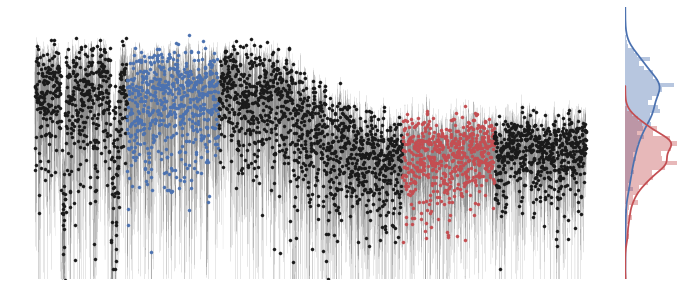

In [154]:
x_ori=abf.dataX
y_ori=abf.dataY

fig = plt.figure(figsize=(12, 5))
grid = plt.GridSpec(1, 11, hspace=0.2, wspace=0.2)

ax1 = fig.add_subplot(grid[:, :10])
plt.scatter(x_ds[trace_start_ds: base_start_ds] ,y_ds[trace_start_ds: base_start_ds] ,alpha=1,c='k',s=10, zorder=1)
plt.scatter(x_ds[base_start_ds : base_end_ds]   ,y_ds[base_start_ds : base_end_ds]   ,alpha=1,c='b',s=10, zorder=1)
plt.scatter(x_ds[base_end_ds   : gaba_start_ds] ,y_ds[base_end_ds   : gaba_start_ds] ,alpha=1,c='k',s=10, zorder=1)
plt.scatter(x_ds[gaba_start_ds : gaba_end_ds]   ,y_ds[gaba_start_ds : gaba_end_ds]   ,alpha=1,c='r',s=10, zorder=1)
plt.scatter(x_ds[gaba_end_ds   : trace_end_ds]  ,y_ds[gaba_end_ds   : trace_end_ds]  ,alpha=1,c='k',s=10, zorder=1)
                 
plt.plot(x_ori[trace_start:trace_end],y_ori[trace_start:trace_end],linewidth=0.1, alpha=0.5,c='k', zorder=0)
# plt.plot(x_ori[base_start:base_end],y_ori[base_start:base_end],alpha=1,c=base_color)
# plt.plot(x_ori[base_end:gaba_start],y_ori[base_end:gaba_start],alpha=1,c=trace_color)
# plt.plot(x_ori[gaba_start:gaba_end],y_ori[gaba_start:gaba_end],alpha=1,c=gaba_color)
# plt.plot(x_ori[gaba_end:trace_end],y_ori[gaba_end:trace_end],alpha=1,c=trace_color)

# plt.scatter(x[trace_start:base_start],y[trace_start:base_start],alpha=0.3,c=trace_color)
# plt.scatter(x[base_start:base_end],y[base_start:base_end],alpha=0.3,c=base_color)
# plt.scatter(x[base_end:gaba_start],y[base_end:gaba_start],alpha=0.3,c=trace_color)
# plt.scatter(x[gaba_start:gaba_end],y[gaba_start:gaba_end],alpha=0.3,c=gaba_color)
# plt.scatter(x[gaba_end:trace_end],y[gaba_end:trace_end],alpha=0.3,c=trace_color)

ax1.axis('off')

ax2 = fig.add_subplot(grid[:, 10:], xticklabels=[], sharey=ax1)
base = sns.distplot(y_ds[base_start_ds:base_end_ds],bins=50, color='b',vertical=True)
gaba = sns.distplot(y_ds[gaba_start_ds:gaba_end_ds],bins=50, color='r',vertical=True)
sns.set_style("white",{})
ax2.set_ylim([-200,0])
ax2.set_yticklabels('')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

In [155]:
base = ax2.get_lines()[0].get_data()
df_base=pd.DataFrame(base[0],base[1],columns=['BASE'])
base_peak = [df_base.idxmax(),df_base.max()]

gaba = ax2.get_lines()[1].get_data()
df_gaba=pd.DataFrame(gaba[0],gaba[1],columns=['GABA'])
gaba_peak = [df_gaba.idxmax(),df_gaba.max()]

In [156]:
np.subtract(gaba_peak[0],base_peak[0])

GABA   -41.333804
dtype: float64